In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
#cargar dataset
import pandas as pd
df = pd.read_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\listings_cleaned_madrid.csv')

In [36]:
df.head()

id                         listing_url       scrape_id last_scraped  \
0  21853  https://www.airbnb.com/rooms/21853  20250305023340   2025-03-11   
1  30320  https://www.airbnb.com/rooms/30320  20250305023340   2025-03-10   
2  30959  https://www.airbnb.com/rooms/30959  20250305023340   2025-03-10   
3  40916  https://www.airbnb.com/rooms/40916  20250305023340   2025-03-10   
4  62423  https://www.airbnb.com/rooms/62423  20250305023340   2025-03-12   

            source                                          name  \
0      city scrape                          Bright and airy room   
1  previous scrape                   Great Vacational Apartments   
2  previous scrape               Beautiful loft in Madrid Center   
3  previous scrape               Holiday Apartment Madrid Center   
4      city scrape  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   

                                         description  \
0  We have a quiet and sunny room with a good vie...   
1                        Great Vacational Apartments   
2  Beautiful Loft 60m2 size just in the historica...   
3                    Holiday Apartment Madrid Center   
4  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   

                               neighborhood_overview  \
0  We live in a leafy neighbourhood with plenty o...   
1  The Plaza Mayor neighborhood in Madrid is one ...   
2  Named  ‚ÄúCoolest in the World‚Äù ‚Äìand located Sou...   
3  The area between Puerta del Sol and Gran V√≠a a...   
4  DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/68483181/87bc...    83531  ...   
1  https://a0.muscache.com/pictures/336868/f67409...   130907  ...   
2  https://a0.muscache.com/pictures/78173471/835e...   132883  ...   
3  https://a0.muscache.com/pictures/336736/c3b486...   130907  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   303845  ...   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           0   
1                              3                                           3   
2                              1                                           1   
3                              3                                           3   
4                              3                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month    city  \
0                                           0              0.26  Madrid   
1                                           0              0.96  Madrid   
2                                           0              0.07  Madrid   
3                                           0              0.28  Madrid   
4                                           0              2.73  Madrid   

   host_antiguedad  dias_desde_ultima_review price_per_person  \
0           5611.0                    2545.0        29.000000   
1           5519.0                    1011.0        82.783019   
2           5517.0                    2956.0        46.447972   
3           5519.0                    1300.0        39.679775   
4           5330.0                     133.0        19.250000   

  categoria_antiguedad_host  
0             M√°s de 5 a√±os  
1             M√°s de 5 a√±os  
2             M√°s de 5 a√±os  
3             M√°s de 5 a√±os  
4             M√°s de 5 a√±os  

[5 rows x 83 columns]

In [37]:
# Example: print the keys of the first row as a dictionary
print(df.iloc[0].to_dict().keys())


dict_keys(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_

In [38]:
import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import shape, MultiPolygon, Polygon
import json

# Cargar archivo GeoJSON y CSV
with open(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.geojson", encoding='utf-8') as f:
    geojson_data = json.load(f)

df_renta = pd.read_csv(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\rentabilidad_barrio.csv")
df_renta["neighbourhood"] = df_renta["neighbourhood"].str.lower().str.strip()

# Procesar geometr√≠as
records = []
for feature in geojson_data['features']:
    props = feature['properties']
    geom = shape(feature['geometry'])

    # Si es multipol√≠gono, tomar el mayor por √°rea
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda g: g.area)
    if isinstance(geom, Polygon):
        props['geometry'] = geom
        props['name_norm'] = props['neighbourhood'].lower().strip()
        records.append(props)

# Crear GeoDataFrame y asignar CRS
gdf = gpd.GeoDataFrame(records, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)  # Establecer sistema de coordenadas para folium

# Uni√≥n de rentabilidad por barrio
merged = gdf.merge(df_renta, left_on="name_norm", right_on="neighbourhood")

# Crear mapa base
m = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# A√±adir capa coropl√©tica
folium.Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=["name_norm", "estimated_revenue_l365d"],
    key_on="feature.properties.name_norm",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rentabilidad Estimada (‚Ç¨ / a√±o)',
).add_to(m)

# A√±adir etiquetas emergentes
for _, row in merged.iterrows():
    folium.Popup(f"{row['name_norm'].title()}: {int(row['estimated_revenue_l365d'])} ‚Ç¨").add_to(
        folium.Marker([row['geometry'].centroid.y, row['geometry'].centroid.x])
    )

# Guardar como HTML interactivo
m.save("mapa_rentabilidad.html")
m



### Conclusiones del mapa de rentabilidad por barrio en Madrid

- **Desigualdad geogr√°fica**: El mapa muestra una clara variabilidad en la rentabilidad anual estimada de los alojamientos tur√≠sticos seg√∫n el barrio. Los barrios c√©ntricos como Sol, Cortes, Embajadores y Justicia presentan las mayores rentabilidades, superando los 13.000‚ÄØ‚Ç¨ anuales en muchos casos.

- **Centro vs. periferia**: Los barrios del centro hist√≥rico concentran la mayor rentabilidad, mientras que en la periferia y barrios residenciales la rentabilidad es notablemente menor, en torno a 2.000‚ÄØ‚Ç¨‚Äì5.000‚ÄØ‚Ç¨ anuales.

- **Influencia de la demanda tur√≠stica**: Las zonas con mayor atractivo tur√≠stico y oferta cultural (Centro, Salamanca, Chamber√≠) destacan por su alta rentabilidad, lo que sugiere una fuerte demanda de alojamiento tur√≠stico en estas √°reas.

- **Oportunidades de inversi√≥n**: Los inversores interesados en maximizar ingresos deber√≠an priorizar barrios c√©ntricos o aquellos con buena conexi√≥n y atractivo tur√≠stico.

- **Desaf√≠os para la vivienda residencial**: La alta rentabilidad en el centro puede estar relacionada con la presi√≥n sobre el mercado de alquiler residencial, encareciendo precios y reduciendo la oferta para residentes locales.

- **Importancia de la localizaci√≥n**: La localizaci√≥n es el factor clave para la rentabilidad de los alojamientos tur√≠sticos en Madrid, por encima de otras variables como el tipo de propiedad o el tama√±o.

En resumen, el mapa coropl√©tico evidencia que la rentabilidad de los alojamientos tur√≠sticos en Madrid est√° fuertemente condicionada por la ubicaci√≥n, siendo el centro de la ciudad el √°rea m√°s lucrativa para este tipo de actividad.

<Axes: title={'center': 'Rentabilidad media por n√∫mero de habitaciones'}, xlabel='Habitaciones', ylabel='‚Ç¨'>

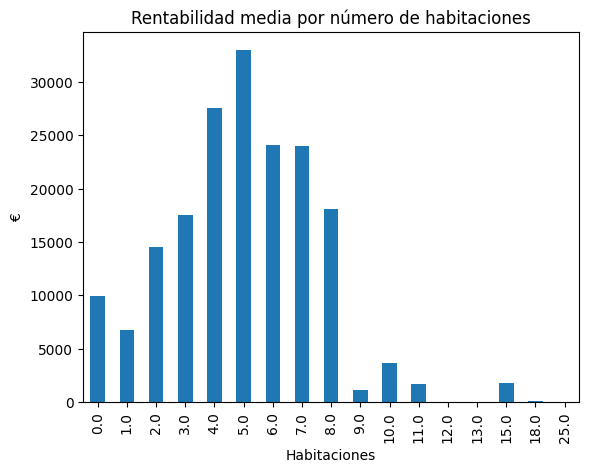

In [39]:
df.groupby("bedrooms")["estimated_revenue_l365d"].mean().plot(kind="bar", title="Rentabilidad media por n√∫mero de habitaciones", ylabel="‚Ç¨", xlabel="Habitaciones")


### Conclusiones del gr√°fico de rentabilidad media seg√∫n n√∫mero de habitaciones

- **Relaci√≥n directa**: Se observa una tendencia clara: a mayor n√∫mero de habitaciones, mayor es la rentabilidad media anual estimada. Esto sugiere que los alojamientos con m√°s habitaciones pueden alojar a m√°s personas y, por tanto, generar mayores ingresos.

- **Incremento progresivo**: El salto de rentabilidad es especialmente notable entre alojamientos de 1, 2 y 3 habitaciones, estabiliz√°ndose o creciendo m√°s lentamente a partir de 4 habitaciones.

- **Oferta y demanda**: Los alojamientos de 1 y 2 habitaciones son los m√°s comunes, pero los de 3 o m√°s habitaciones, aunque menos frecuentes, pueden captar grupos m√°s grandes y turistas familiares, lo que incrementa su rentabilidad.

- **Estrategia de inversi√≥n**: Para maximizar ingresos, puede ser interesante invertir en propiedades con m√°s de una habitaci√≥n, siempre considerando la demanda y la ocupaci√≥n media en cada segmento.

- **Limitaciones**: El gr√°fico muestra medias, por lo que puede haber variabilidad significativa dentro de cada categor√≠a seg√∫n ubicaci√≥n, estado del inmueble y otros factores.

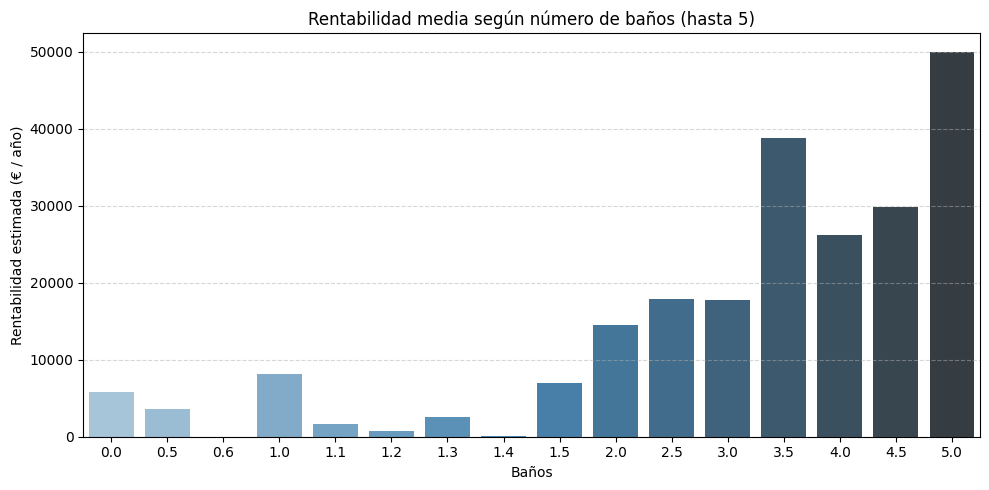

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Redondear los ba√±os a 0.5 m√°s cercano
df["ba√±os_redondeados"] = df["bathrooms"].round(1)

# Agrupar por n√∫mero de ba√±os (hasta 5 m√°ximo)
df_filtrado = df[df["ba√±os_redondeados"] <= 5]

# Calcular rentabilidad media
agrupado = df_filtrado.groupby("ba√±os_redondeados")["estimated_revenue_l365d"].mean().reset_index()

# Ordenar
agrupado = agrupado.sort_values("ba√±os_redondeados")

# Gr√°fico
plt.figure(figsize=(10, 5))
sns.barplot(x="ba√±os_redondeados", y="estimated_revenue_l365d", data=agrupado, palette="Blues_d")

plt.title("Rentabilidad media seg√∫n n√∫mero de ba√±os (hasta 5)")
plt.xlabel("Ba√±os")
plt.ylabel("Rentabilidad estimada (‚Ç¨ / a√±o)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Conclusiones del gr√°fico de rentabilidad media por capacidad de hu√©spedes

- **Tendencia creciente**: El gr√°fico muestra que, en general, a mayor capacidad de alojamiento (m√°s hu√©spedes), la rentabilidad media anual tiende a aumentar. Esto sugiere que los alojamientos que pueden hospedar a m√°s personas generan mayores ingresos anuales.

- **Segmentos m√°s rentables**: Los alojamientos con capacidad para grupos medianos y grandes (por ejemplo, 4 o m√°s hu√©spedes) presentan una rentabilidad significativamente superior respecto a los de menor capacidad.

- **Demanda de grupos**: Esta tendencia puede estar relacionada con la demanda de grupos familiares o de amigos que buscan alojamientos tur√≠sticos, lo que incrementa la ocupaci√≥n y el precio medio por noche.

- **L√≠mites de crecimiento**: Aunque la rentabilidad aumenta con la capacidad, es posible que a partir de cierto n√∫mero de hu√©spedes el crecimiento se estabilice o incluso disminuya, debido a la menor demanda de alojamientos muy grandes o a la mayor competencia en ese segmento.

- **Estrategia de inversi√≥n**: Para maximizar la rentabilidad, puede ser interesante enfocar la oferta en alojamientos con capacidad para grupos, siempre considerando la demanda real y la normativa local.

<Axes: title={'center': 'Rentabilidad media por capacidad'}, xlabel='Hu√©spedes', ylabel='‚Ç¨'>

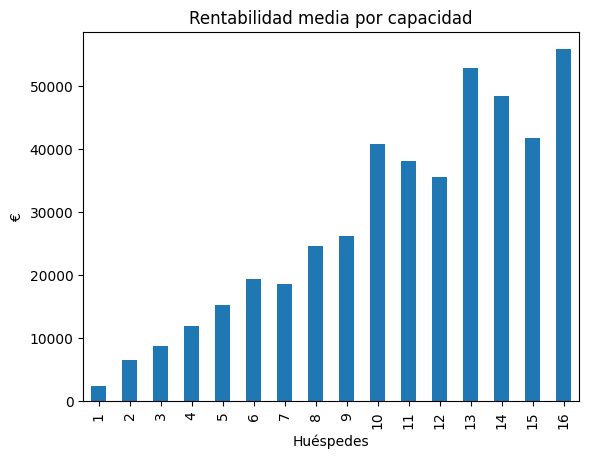

In [41]:
df.groupby("accommodates")["estimated_revenue_l365d"].mean().plot(kind="bar", title="Rentabilidad media por capacidad", ylabel="‚Ç¨", xlabel="Hu√©spedes")


### Conclusiones del gr√°fico de rentabilidad por tipo de habitaci√≥n

- **Diferencias claras por tipo de habitaci√≥n**: El gr√°fico muestra que la rentabilidad anual estimada var√≠a significativamente seg√∫n el tipo de habitaci√≥n ofertada en Madrid.

- **Mayor rentabilidad en viviendas completas**: Los alojamientos de tipo "Entire home/apt" (vivienda completa) presentan, en general, una rentabilidad media anual superior al resto de categor√≠as. Esto se debe a que pueden alojar a m√°s personas y suelen tener tarifas m√°s altas por noche.

- **Habitaciones privadas con rentabilidad intermedia**: Las "Private room" (habitaciones privadas) muestran una rentabilidad media menor que las viviendas completas, pero superior a las habitaciones compartidas. Son una opci√≥n atractiva para anfitriones con espacio limitado.

- **Habitaciones compartidas, menor rentabilidad**: Las "Shared room" (habitaciones compartidas) tienen la rentabilidad media m√°s baja, reflejando una menor demanda y precios m√°s bajos.

- **Importancia de la oferta**: La mayor√≠a de los anuncios corresponden a viviendas completas y habitaciones privadas, lo que tambi√©n influye en la rentabilidad media observada en cada categor√≠a.

- **Estrategia para anfitriones**: Para maximizar ingresos, resulta m√°s rentable ofrecer viviendas completas, aunque la inversi√≥n inicial y los costes de mantenimiento suelen ser mayores. Las habitaciones privadas pueden ser una alternativa interesante para quienes buscan ingresos adicionales con menor inversi√≥n.

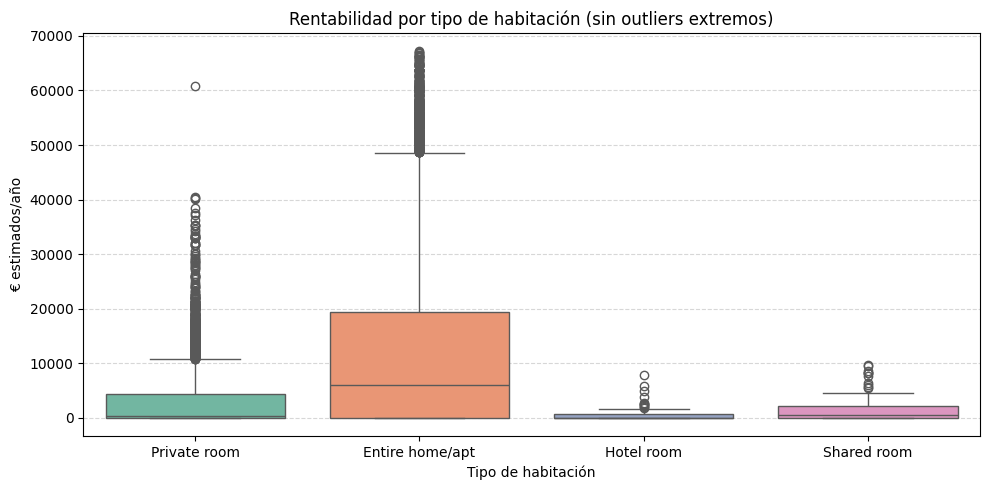

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recortar valores extremos (ej: por debajo del percentil 99)
limite = df["estimated_revenue_l365d"].quantile(0.99)
df_filtrado = df[df["estimated_revenue_l365d"] <= limite]

plt.figure(figsize=(10, 5))
sns.boxplot(x="room_type", y="estimated_revenue_l365d", data=df_filtrado, palette="Set2")

plt.title("Rentabilidad por tipo de habitaci√≥n (sin outliers extremos)")
plt.ylabel("‚Ç¨ estimados/a√±o")
plt.xlabel("Tipo de habitaci√≥n")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### Conclusiones del gr√°fico de rentabilidad media por barrio en Madrid

- **Gran variabilidad geogr√°fica**: La rentabilidad anual estimada de los alojamientos tur√≠sticos var√≠a notablemente entre barrios. Los barrios c√©ntricos como Palacio, Cortes, Justicia y Embajadores destacan por tener las rentabilidades m√°s altas, superando los 13.000‚ÄØ‚Ç¨ anuales en muchos casos.

- **Centro vs. periferia**: Los barrios del centro hist√≥rico concentran la mayor rentabilidad, mientras que en la periferia y barrios residenciales la rentabilidad es considerablemente menor, situ√°ndose en torno a 2.000‚ÄØ‚Ç¨‚Äì5.000‚ÄØ‚Ç¨ anuales.

- **Influencia de la demanda tur√≠stica**: Las zonas con mayor atractivo tur√≠stico y oferta cultural presentan una rentabilidad superior, lo que sugiere una fuerte demanda de alojamiento tur√≠stico en estas √°reas.

- **Oportunidades de inversi√≥n**: Para maximizar ingresos, los inversores deber√≠an priorizar barrios c√©ntricos o aquellos con buena conexi√≥n y atractivo tur√≠stico.

- **Desaf√≠os para la vivienda residencial**: La alta rentabilidad en el centro puede estar relacionada con la presi√≥n sobre el mercado de alquiler residencial, encareciendo precios y reduciendo la oferta para residentes locales.

- **Importancia de la localizaci√≥n**: La ubicaci√≥n es el factor clave para la rentabilidad de los alojamientos tur√≠sticos en Madrid, por encima de otras variables como el tipo de propiedad o el tama√±o.

### FASE 3: QUE TIPO DE PISO ES MAS RENTABLE

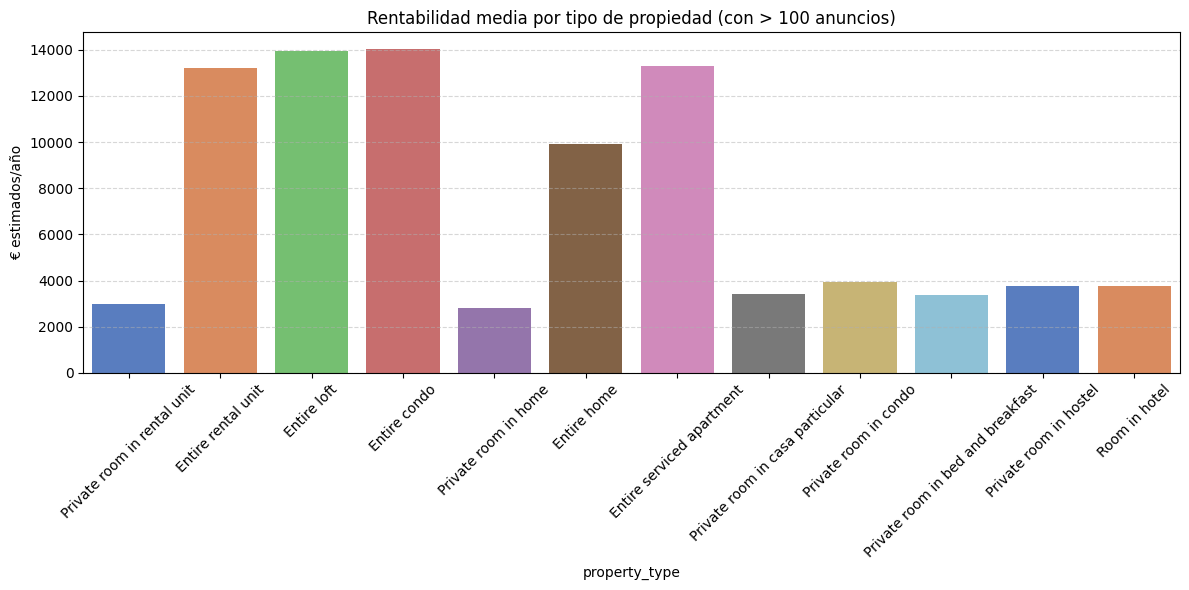

In [43]:
# RENTABILIDAD POR TIPO DE PROPIEADAD
# Agrupar por tipo de propiedad con m√°s de 100 registros
prop_counts = df['property_type'].value_counts()
tipos_validos = prop_counts[prop_counts > 100].index

df_prop = df[df['property_type'].isin(tipos_validos)]

# Rentabilidad media
plt.figure(figsize=(12, 6))
sns.barplot(data=df_prop, x="property_type", y="estimated_revenue_l365d", estimator='mean', ci=None, palette="muted")
plt.xticks(rotation=45)
plt.ylabel("‚Ç¨ estimados/a√±o")
plt.title("Rentabilidad media por tipo de propiedad (con > 100 anuncios)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


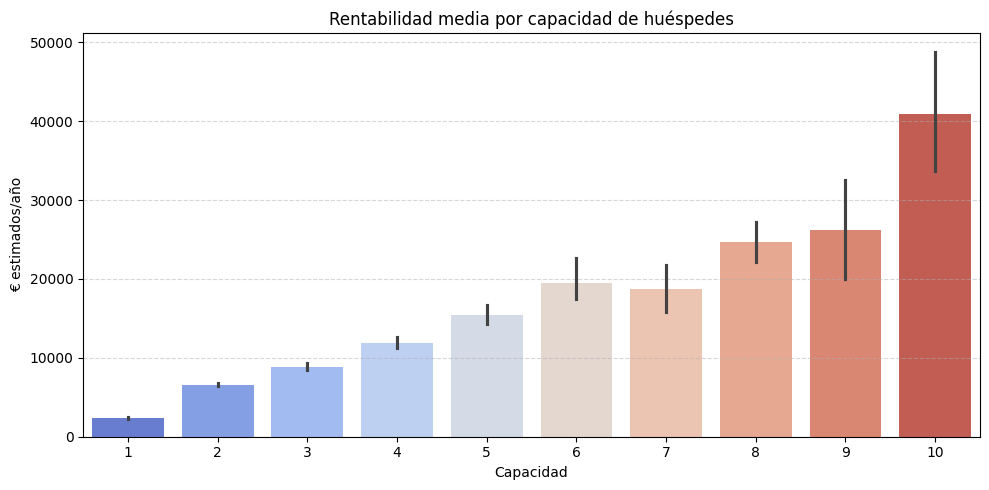

In [44]:
#rENTABILIDAD POR CAPACIDAD DE HU√âSPEDES
# Filtrar alojamientos con capacidad realista (hasta 10)
df_cap = df[df["accommodates"] <= 10]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_cap, x="accommodates", y="estimated_revenue_l365d", estimator='mean', palette="coolwarm")
plt.title("Rentabilidad media por capacidad de hu√©spedes")
plt.xlabel("Capacidad")
plt.ylabel("‚Ç¨ estimados/a√±o")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


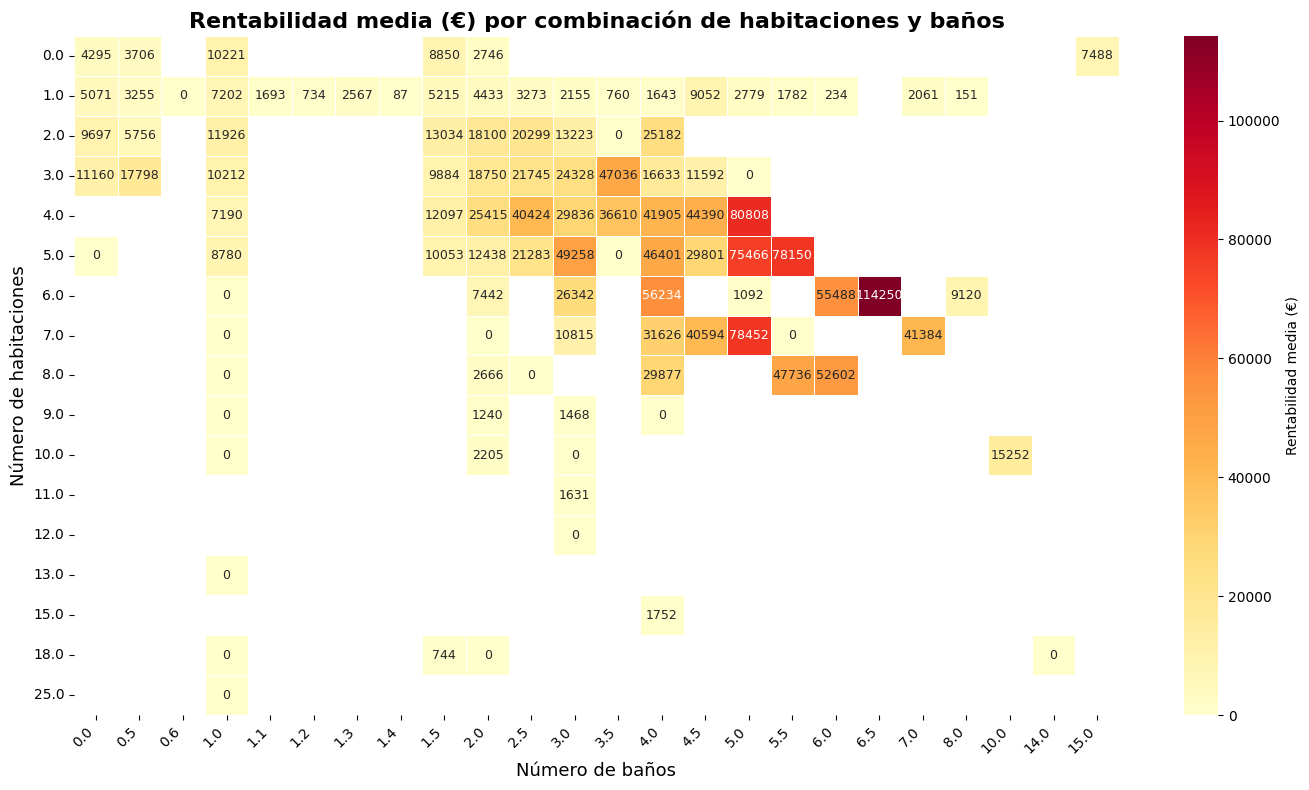

In [45]:
# Crear tabla din√°mica para rentabilidad media por combinaci√≥n de habitaciones y ba√±os
pivot1 = df.pivot_table(
    index="bedrooms",
    columns="ba√±os_redondeados",
    values="estimated_revenue_l365d",
    aggfunc="mean"
)

# Mejorar visualizaci√≥n de la matriz de calor
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot1,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': 'Rentabilidad media (‚Ç¨)'},
    mask=pivot1.isnull(),
    square=False,
    annot_kws={"size": 9}
)
plt.title("Rentabilidad media (‚Ç¨) por combinaci√≥n de habitaciones y ba√±os", fontsize=16, fontweight='bold')
plt.xlabel("N√∫mero de ba√±os", fontsize=13)
plt.ylabel("N√∫mero de habitaciones", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Interpretaci√≥n de la matriz de rentabilidad media por combinaci√≥n de habitaciones y ba√±os

La matriz muestra la rentabilidad media anual estimada (‚Ç¨) seg√∫n el n√∫mero de habitaciones (`bedrooms`, filas) y el n√∫mero de ba√±os redondeados (`ba√±os_redondeados`, columnas) para los alojamientos tur√≠sticos en Madrid.

**Principales conclusiones:**

- **Tendencia general:** A mayor n√∫mero de habitaciones y ba√±os, la rentabilidad media tiende a aumentar. Las combinaciones con m√°s habitaciones y m√°s ba√±os suelen mostrar valores m√°s altos de rentabilidad anual.
- **Rentabilidad m√°xima:** Las celdas con valores m√°s elevados se encuentran en alojamientos con 3 o m√°s habitaciones y 2 o m√°s ba√±os, lo que indica que las viviendas grandes y bien equipadas son las m√°s rentables.
- **Variabilidad:** Existen celdas con valores at√≠picos o muy altos, probablemente debidos a pocos registros en esas combinaciones (por ejemplo, 4 habitaciones y 5 ba√±os).
- **Segmentos menos rentables:** Los alojamientos con 1 habitaci√≥n y 1 ba√±o presentan rentabilidades medias significativamente menores, lo que sugiere que los estudios y apartamentos peque√±os generan menos ingresos anuales.
- **Datos faltantes:** Muchas combinaciones no tienen datos (celdas vac√≠as), lo que indica que son poco frecuentes en la oferta de Airbnb en Madrid.

**Recomendaci√≥n:** Para maximizar la rentabilidad, conviene invertir en propiedades con varias habitaciones y ba√±os, aunque siempre considerando la demanda real y la inversi√≥n inicial necesaria.

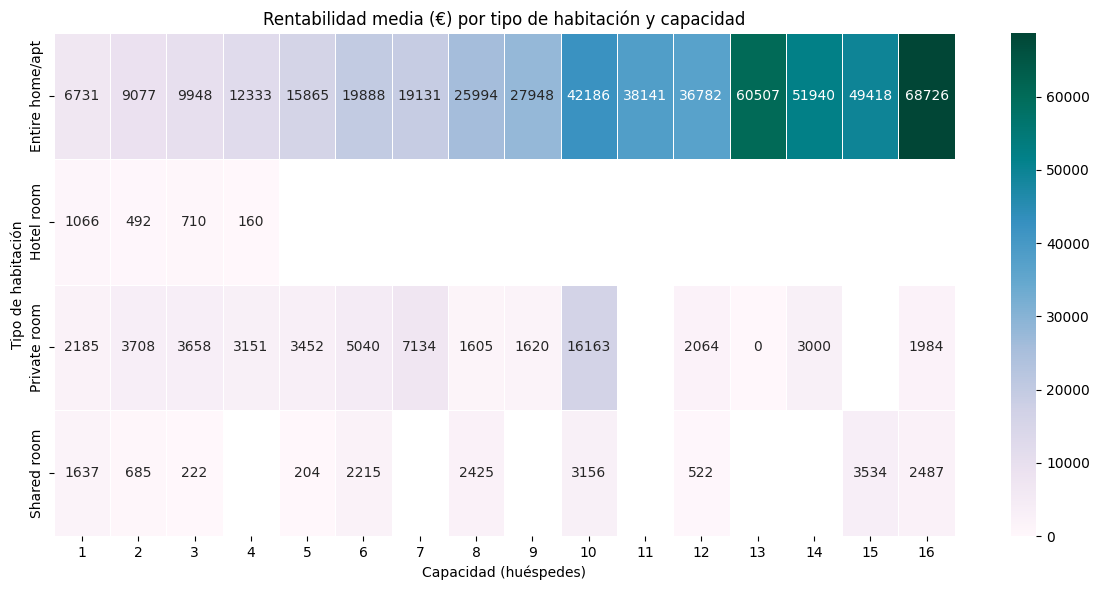

In [46]:
# Crear tabla din√°mica para rentabilidad media por tipo de habitaci√≥n y capacidad
pivot2 = df.pivot_table(
	index="room_type",
	columns="accommodates",
	values="estimated_revenue_l365d",
	aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot2, annot=True, fmt=".0f", cmap="PuBuGn", linewidths=0.5, linecolor="white")
plt.title("Rentabilidad media (‚Ç¨) por tipo de habitaci√≥n y capacidad")
plt.xlabel("Capacidad (hu√©spedes)")
plt.ylabel("Tipo de habitaci√≥n")
plt.tight_layout()
plt.show()


### Interpretaci√≥n de la matriz de rentabilidad media por tipo de habitaci√≥n y capacidad

La matriz muestra la rentabilidad media anual estimada (‚Ç¨) seg√∫n el tipo de habitaci√≥n (`room_type`, filas) y la capacidad de hu√©spedes (`accommodates`, columnas) para los alojamientos tur√≠sticos en Madrid.

**Principales conclusiones:**

- **Viviendas completas, mayor rentabilidad:** Los alojamientos de tipo "Entire home/apt" presentan la rentabilidad media m√°s alta en todos los rangos de capacidad, especialmente a partir de 4 hu√©spedes, donde el crecimiento es muy notable.
- **Habitaciones privadas y compartidas:** Las "Private room" y "Shared room" muestran rentabilidades medias significativamente menores, con valores que apenas superan los 2.000‚Äì3.000‚ÄØ‚Ç¨ anuales para la mayor√≠a de capacidades.
- **Efecto de la capacidad:** En viviendas completas, la rentabilidad crece de forma casi lineal con la capacidad, alcanzando valores superiores a 40.000‚ÄØ‚Ç¨ anuales para alojamientos de gran tama√±o (10 o m√°s hu√©spedes). En habitaciones privadas y compartidas, el incremento es mucho m√°s moderado.
- **Hotel room:** Los alojamientos clasificados como "Hotel room" presentan rentabilidades bajas y poco representativas, probablemente por el bajo n√∫mero de registros en algunas capacidades.
- **Segmentos m√°s rentables:** El segmento m√°s rentable es el de viviendas completas con capacidad para grupos grandes (8 o m√°s hu√©spedes), aunque son menos frecuentes en la oferta.

**Recomendaci√≥n:** Para maximizar la rentabilidad, resulta m√°s interesante invertir en viviendas completas con capacidad para grupos, ya que combinan alta demanda y precios medios elevados. Las habitaciones privadas y compartidas pueden ser una opci√≥n para ingresos adicionales, pero su potencial de rentabilidad es mucho menor.

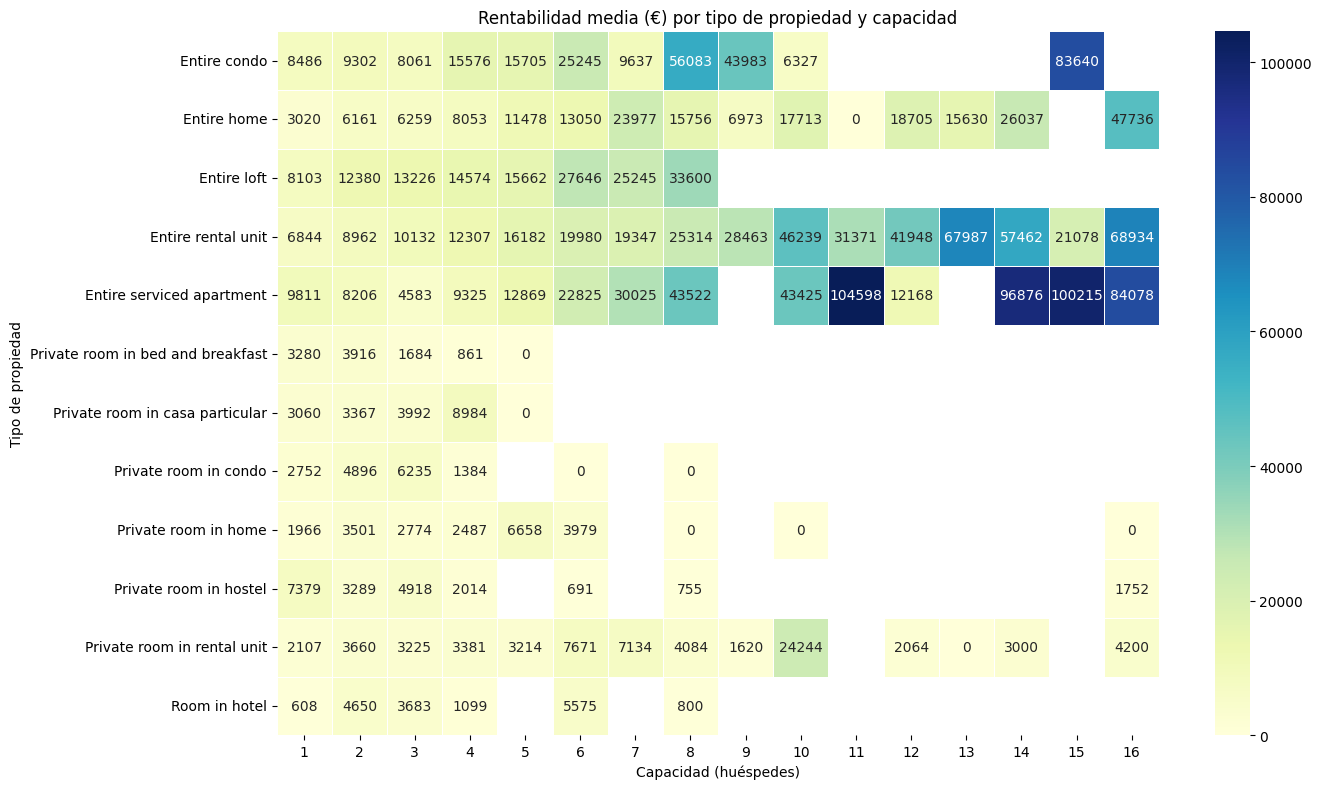

In [47]:
# Crear tabla din√°mica para rentabilidad media por tipo de propiedad y capacidad
pivot3 = df_prop.pivot_table(
	index="property_type",
	columns="accommodates",
	values="estimated_revenue_l365d",
	aggfunc="mean"
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot3, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, linecolor="white")
plt.title("Rentabilidad media (‚Ç¨) por tipo de propiedad y capacidad")
plt.xlabel("Capacidad (hu√©spedes)")
plt.ylabel("Tipo de propiedad")
plt.tight_layout()
plt.show()


### Interpretaci√≥n de la matriz de rentabilidad media por tipo de propiedad y capacidad

La matriz muestra la rentabilidad media anual estimada (‚Ç¨) seg√∫n el tipo de propiedad (`property_type`, filas) y la capacidad de hu√©spedes (`accommodates`, columnas) para los alojamientos tur√≠sticos en Madrid.

**Principales conclusiones:**

- **Viviendas completas, mayor rentabilidad:** Las propiedades tipo "Entire rental unit", "Entire condo", "Entire loft" y "Entire home" presentan las rentabilidades medias m√°s altas, especialmente a partir de 4 hu√©spedes, donde el crecimiento es muy notable. Esto indica que las viviendas completas y de mayor tama√±o son las m√°s rentables.
- **Apartamentos de servicio y lofts:** Los "Entire serviced apartment" y "Entire loft" tambi√©n muestran rentabilidades elevadas, sobre todo en capacidades medias y altas, lo que sugiere que son opciones atractivas para grupos y estancias largas.
- **Habitaciones privadas, menor rentabilidad:** Las "Private room in rental unit", "Private room in home", "Private room in condo" y similares tienen rentabilidades medias significativamente menores, reflejando su menor precio por noche y capacidad limitada.
- **Hoteles y hostales:** Las categor√≠as "Room in hotel" y "Private room in hostel" muestran rentabilidades variables, generalmente inferiores a las viviendas completas, y pueden estar influenciadas por el bajo n√∫mero de registros en algunas capacidades.
- **Efecto de la capacidad:** En la mayor√≠a de tipos de propiedad, la rentabilidad aumenta con la capacidad de hu√©spedes, aunque en algunos casos se observan valores at√≠picos o decrecimientos, probablemente por baja frecuencia de ciertas combinaciones.

**Recomendaci√≥n:** Para maximizar la rentabilidad, resulta m√°s interesante invertir en viviendas completas (apartamentos, lofts, condos) con capacidad para grupos, ya que combinan alta demanda y precios medios elevados. Las habitaciones privadas pueden ser una opci√≥n para ingresos adicionales, pero su potencial de rentabilidad es mucho menor.

In [48]:
# Top 5 combinaciones m√°s rentables de habitaciones y ba√±os
max_bed_bath = pivot1.stack().sort_values(ascending=False).head(5).reset_index()
max_bed_bath.columns = ["bedrooms", "bathrooms", "rentabilidad"]
print("üîù Top combinaciones rentables (habitaciones - ba√±os):")
print(max_bed_bath)


üîù Top combinaciones rentables (habitaciones - ba√±os):
   bedrooms  bathrooms   rentabilidad
0       6.0        6.5  114250.500000
1       4.0        5.0   80808.000000
2       7.0        5.0   78452.000000
3       5.0        5.5   78150.000000
4       5.0        5.0   75465.692908


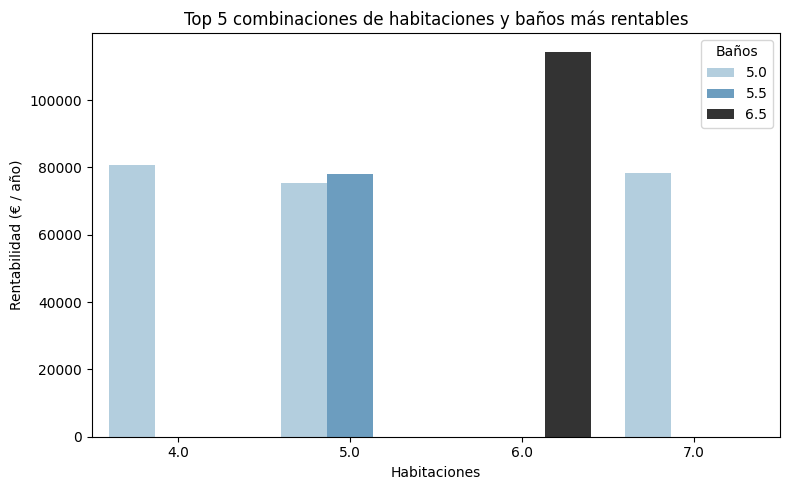

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=max_bed_bath, x="bedrooms", y="rentabilidad", hue="bathrooms", palette="Blues_d")
plt.title("Top 5 combinaciones de habitaciones y ba√±os m√°s rentables")
plt.xlabel("Habitaciones")
plt.ylabel("Rentabilidad (‚Ç¨ / a√±o)")
plt.legend(title="Ba√±os")
plt.tight_layout()
plt.show()


### Conclusiones del gr√°fico de las combinaciones m√°s rentables de habitaciones y ba√±os

- **Mayor rentabilidad en viviendas grandes:** Las combinaciones con mayor n√∫mero de habitaciones y ba√±os (por ejemplo, 6 habitaciones y 6,5 ba√±os) presentan la rentabilidad anual m√°s alta, superando los 100.000‚ÄØ‚Ç¨.
- **Incremento progresivo:** A medida que aumenta el n√∫mero de habitaciones y ba√±os, la rentabilidad media anual tambi√©n crece de forma significativa.
- **Segmentos exclusivos:** Las combinaciones m√°s rentables corresponden a propiedades de gran tama√±o, probablemente orientadas a grupos grandes o alquileres premium, que son menos frecuentes pero muy lucrativas.
- **Importancia de los ba√±os:** No solo el n√∫mero de habitaciones, sino tambi√©n el de ba√±os, influye de manera relevante en la rentabilidad, ya que aporta comodidad y valor a√±adido al alojamiento.
- **Oportunidad de inversi√≥n:** Invertir en propiedades con varias habitaciones y ba√±os puede maximizar los ingresos, aunque requiere una inversi√≥n inicial m√°s elevada y puede estar sujeto a una demanda m√°s espec√≠fica.

In [50]:
# Top 5 combinaciones m√°s rentables de tipo de habitaci√≥n y capacidad
max_room_accom = pivot2.stack().sort_values(ascending=False).head(5).reset_index()
max_room_accom.columns = ["room_type", "accommodates", "rentabilidad"]
print("üîù Top combinaciones rentables (tipo de habitaci√≥n - capacidad):")
print(max_room_accom)


üîù Top combinaciones rentables (tipo de habitaci√≥n - capacidad):
         room_type  accommodates  rentabilidad
0  Entire home/apt            16  68725.551724
1  Entire home/apt            13  60507.428571
2  Entire home/apt            14  51940.384615
3  Entire home/apt            15  49417.800000
4  Entire home/apt            10  42186.313544


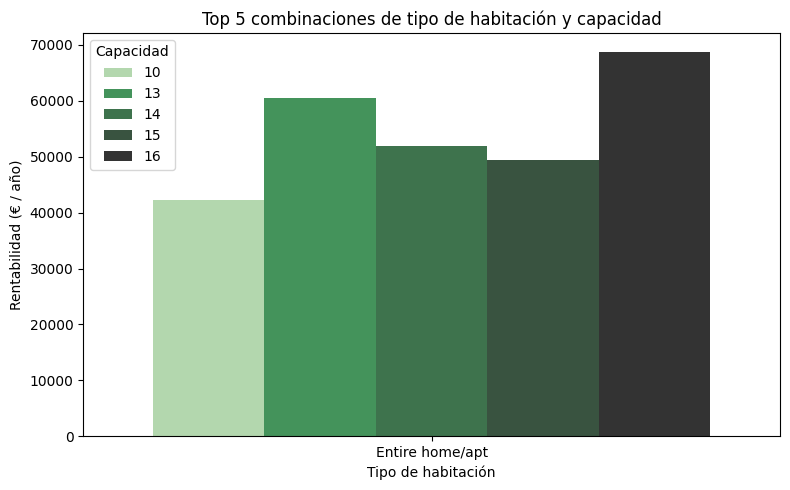

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(data=max_room_accom, x="room_type", y="rentabilidad", hue="accommodates", palette="Greens_d")
plt.title("Top 5 combinaciones de tipo de habitaci√≥n y capacidad")
plt.xlabel("Tipo de habitaci√≥n")
plt.ylabel("Rentabilidad (‚Ç¨ / a√±o)")
plt.legend(title="Capacidad")
plt.tight_layout()
plt.show()


### Conclusiones del gr√°fico de las combinaciones m√°s rentables de tipo de habitaci√≥n y capacidad

- **Viviendas completas, m√°xima rentabilidad:** Las combinaciones m√°s rentables corresponden a la categor√≠a "Entire home/apt" (vivienda completa) con capacidades altas (de 10 a 16 hu√©spedes), superando los 40.000‚ÄØ‚Ç¨ anuales y alcanzando valores cercanos a 70.000‚ÄØ‚Ç¨.
- **Capacidad, factor clave:** A mayor capacidad de alojamiento, mayor es la rentabilidad media anual, lo que indica que los alojamientos preparados para grupos grandes generan los mayores ingresos.
- **Escasa rentabilidad en otras categor√≠as:** No aparecen en el top habitaciones privadas o compartidas, lo que confirma que su potencial de rentabilidad es mucho menor frente a las viviendas completas.
- **Segmento premium:** Estas combinaciones suelen corresponder a propiedades exclusivas, orientadas a grupos numerosos o alquileres premium, que aunque son menos frecuentes, resultan muy lucrativas.
- **Estrategia de inversi√≥n:** Para maximizar ingresos, resulta m√°s rentable invertir en viviendas completas de gran capacidad, aunque requieren mayor inversi√≥n inicial y gesti√≥n.

In [52]:
# Top 5 combinaciones m√°s rentables de tipo de propiedad y capacidad
max_prop_accom = pivot3.stack().sort_values(ascending=False).head(5).reset_index()
max_prop_accom.columns = ["property_type", "accommodates", "rentabilidad"]
print("üîù Top combinaciones rentables (tipo de propiedad - capacidad):")
print(max_prop_accom)


üîù Top combinaciones rentables (tipo de propiedad - capacidad):
               property_type  accommodates  rentabilidad
0  Entire serviced apartment            11      104598.0
1  Entire serviced apartment            15      100215.0
2  Entire serviced apartment            14       96876.0
3  Entire serviced apartment            16       84078.0
4               Entire condo            15       83640.0


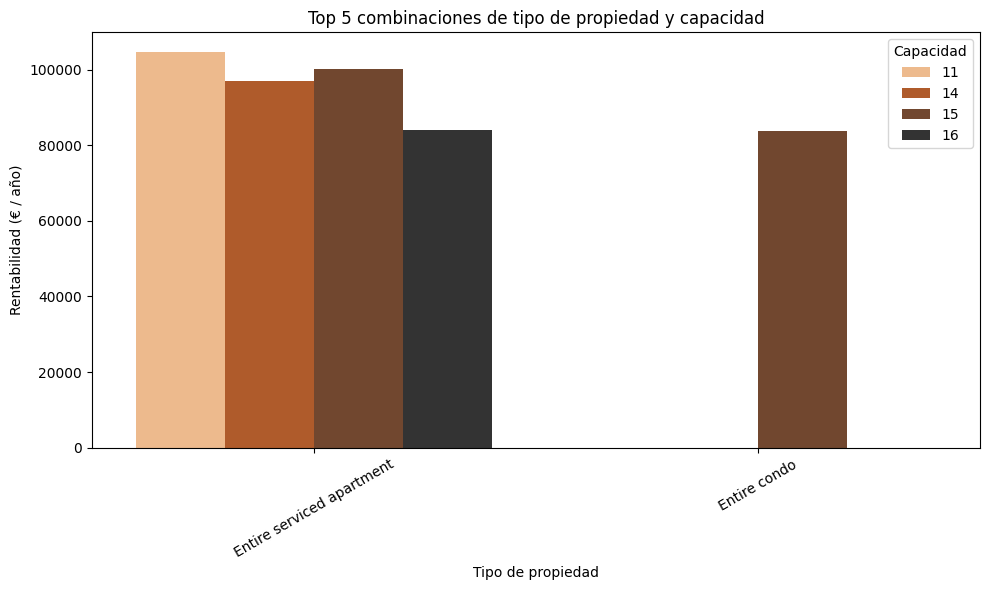

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=max_prop_accom, x="property_type", y="rentabilidad", hue="accommodates", palette="Oranges_d")
plt.title("Top 5 combinaciones de tipo de propiedad y capacidad")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Rentabilidad (‚Ç¨ / a√±o)")
plt.xticks(rotation=30)
plt.legend(title="Capacidad")
plt.tight_layout()
plt.show()


### Conclusiones del gr√°fico de las combinaciones m√°s rentables de tipo de propiedad y capacidad

- **Apartamentos de servicio, m√°xima rentabilidad:** Las combinaciones m√°s rentables corresponden a "Entire serviced apartment" con capacidades altas (11 a 16 hu√©spedes), superando los 80.000‚ÄØ‚Ç¨ anuales y alcanzando valores por encima de 100.000‚ÄØ‚Ç¨.
- **Propiedades completas y grandes:** Los "Entire condo" tambi√©n aparecen entre las opciones m√°s rentables, especialmente para grupos grandes (15 hu√©spedes).
- **Capacidad, factor clave:** Todas las combinaciones top corresponden a propiedades completas con alta capacidad, lo que confirma que alojar a grupos numerosos maximiza los ingresos.
- **Segmento premium:** Estas propiedades suelen ser exclusivas y menos frecuentes, orientadas a alquileres premium o grupos grandes.
- **Estrategia de inversi√≥n:** Para obtener la mayor rentabilidad, resulta m√°s interesante invertir en apartamentos de servicio o condominios completos de gran capacidad, aunque requieren mayor inversi√≥n y gesti√≥n.

In [68]:
import pandas as pd

# Cargar los archivos CSV
df_precio = pd.read_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_corregido.csv')
df_neighbourhoods = pd.read_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.csv')

# Normalizar los nombres de los barrios en ambos DataFrames
df_precio['neighbourhood'] = df_precio['neighbourhood'].str.lower().str.strip()
df_neighbourhoods['neighbourhood_group'] = df_neighbourhoods['neighbourhood_group'].str.lower().str.strip()

# Diccionario de mapeo para ajustar los nombres
mapeo_nombres = {
    'fuencarral-el pardo': 'fuencarral - el pardo',
    'moncloa-aravaca': 'moncloa - aravaca',
    'san blas-canillejas': 'san blas - canillejas',
    'villa de vallecas': 'villa de vallecas',
    'vic√°lvaro': 'vic√°lvaro',
    'puente de vallecas': 'puente de vallecas',
    'chamart√≠n': 'chamart√≠n',
    'chamber√≠': 'chamber√≠',
    'ciudad lineal': 'ciudad lineal',
    'tetu√°n': 'tetu√°n',
    'retiro': 'retiro',
    'salamanca': 'salamanca',
    'latina': 'latina',
    'usera': 'usera',
    'carabanchel': 'carabanchel',
    'arganzuela': 'arganzuela',
    'barajas': 'barajas',
    'centro': 'centro',
    'hortaleza': 'hortaleza',
}

# Aplicar el mapeo para corregir los nombres en el DataFrame de precios
df_precio['neighbourhood'] = df_precio['neighbourhood'].replace(mapeo_nombres)

# Guardar el archivo corregido
df_precio.to_csv(r'C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_final.csv', index=False)

print("‚úÖ Nombres de barrios ajustados y archivo guardado.")

‚úÖ Nombres de barrios ajustados y archivo guardado.


In [86]:
# A√±adir columna 'neighbourhood_group' a df_precio mediante merge
df_precio = df_precio.merge(
	df_neighbourhoods[['neighbourhood', 'neighbourhood_group']],
	on='neighbourhood',
	how='left'
)

media_precio_distrito = df_precio.groupby('neighbourhood_group')['price_per_m2_jun2025'].mean()
print(media_precio_distrito)


Series([], Name: price_per_m2_jun2025, dtype: float64)


In [89]:
pd.set_option('display.max_rows', None)
print(df_precio)


            neighbourhood  price_per_m2_jun2025 monthly_change  \
0              arganzuela                  5729          +1.0%   
1                 barajas                  4415          +1.0%   
2             carabanchel                  3308          +2.4%   
3                  centro                  7253          +0.8%   
4               chamart√≠n                  7369          +2.7%   
5                chamber√≠                  8333          +2.9%   
6           ciudad lineal                  4606          +2.8%   
7   fuencarral - el pardo                  4888          +1.2%   
8               hortaleza                  5031          +1.6%   
9                  latina                  3638           n.d.   
10      moncloa - aravaca                  5811          +2.1%   
11              moratalaz                  3902           n.d.   
12     puente de vallecas                  2851          +1.3%   
13                 retiro                  7295          +0.1%   
14      

In [91]:
# Rellenar los barrios sin valor con la media de su distrito
# Calcular la media del precio por distrito (neighbourhood_group)
media_distritos = df_precio.groupby('neighbourhood_group')['price_per_m2_jun2025'].mean().to_dict()

# Crear columna de precio para cada barrio, usando la media del distrito
df_precio['precio_neighbourhood'] = df_precio.apply(
    lambda row: media_distritos[row['neighbourhood_group']] if pd.notna(row['neighbourhood_group']) else np.nan,
    axis=1
)


In [ ]:
df_precio = df_precio.drop(columns=['neighbourhood_group', 'precio_neighbourhood'])


In [103]:
pd.set_option('display.max_rows', None)
print(df_precio)


            neighbourhood  price_per_m2_jun2025 monthly_change quarterly_change annual_change  max_historical_price variation_from_max              name_norm
0              arganzuela                  5729          +1.0%            +7.3%        +18.1%                  5729               0.0%             arganzuela
1                 barajas                  4415          +1.0%            +8.5%        +19.8%                  4415               0.0%                barajas
2             carabanchel                  3308          +2.4%            +8.9%        +22.9%                  3308               0.0%            carabanchel
3                  centro                  7253          +0.8%            +6.4%        +11.5%                  7253               0.0%                 centro
4               chamart√≠n                  7369          +2.7%            +5.4%         +7.2%                  7369               0.0%              chamart√≠n
5                chamber√≠                  8333  

In [107]:
# Limpiar la columna monthly_change: sustituir 'n.d.' por '0.0%'
if 'monthly_change' in df_precio.columns:
    df_precio['monthly_change'] = df_precio['monthly_change'].replace('n.d.', '0.0%')

# Mostrar el DataFrame limpio
pd.set_option('display.max_rows', None)
print(df_precio)

            neighbourhood  price_per_m2_jun2025 monthly_change quarterly_change annual_change  max_historical_price variation_from_max              name_norm
0              arganzuela                  5729          +1.0%            +7.3%        +18.1%                  5729               0.0%             arganzuela
1                 barajas                  4415          +1.0%            +8.5%        +19.8%                  4415               0.0%                barajas
2             carabanchel                  3308          +2.4%            +8.9%        +22.9%                  3308               0.0%            carabanchel
3                  centro                  7253          +0.8%            +6.4%        +11.5%                  7253               0.0%                 centro
4               chamart√≠n                  7369          +2.7%            +5.4%         +7.2%                  7369               0.0%              chamart√≠n
5                chamber√≠                  8333  

In [116]:
import json
from shapely.geometry import shape, MultiPolygon, Polygon
import geopandas as gpd

# Cargar archivo GeoJSON
with open(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.geojson", encoding='utf-8') as f:
    geojson_data = json.load(f)

# Procesar geometr√≠as y crear name_norm
records = []
for feature in geojson_data['features']:
    props = feature['properties']
    geom = shape(feature['geometry'])
    
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda g: g.area)
    if isinstance(geom, Polygon):
        props['geometry'] = geom
        props['name_norm'] = props['neighbourhood'].lower().strip()  # CREACI√ìN AQU√ç
        records.append(props)

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(records, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# Verificar los primeros valores
print("üîé Primeros barrios en GeoJSON con name_norm:")
print(gdf[["neighbourhood", "name_norm"]].head())


üîé Primeros barrios en GeoJSON con name_norm:
  neighbourhood    name_norm
0       Palacio      palacio
1   Embajadores  embajadores
2        Cortes       cortes
3      Justicia     justicia
4   Universidad  universidad


In [119]:
# Normalizar los nombres en ambas columnas
df_precio["neighbourhood"] = df_precio["neighbourhood"].str.lower().str.strip()
df_precio["name_norm"] = df_precio["neighbourhood"]

# Verificar que los valores sean iguales
print("üìä Verificaci√≥n de valores unificados:")
print(df_precio[["neighbourhood", "name_norm"]].head())

üìä Verificaci√≥n de valores unificados:
  neighbourhood    name_norm
0    arganzuela   arganzuela
1       barajas      barajas
2   carabanchel  carabanchel
3        centro       centro
4     chamart√≠n    chamart√≠n


In [120]:
import pandas as pd

# Cargar precios ‚Ç¨/m¬≤
df_precio = pd.read_csv(r"C:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_final.csv")

# Normalizar y crear name_norm
df_precio["neighbourhood"] = df_precio["neighbourhood"].str.lower().str.strip()
df_precio["name_norm"] = df_precio["neighbourhood"]  # CREACI√ìN AQU√ç

# Verificar
print("üìä Primeros barrios en CSV con name_norm:")
print(df_precio[["neighbourhood", "name_norm", "price_per_m2_jun2025"]].head())


üìä Primeros barrios en CSV con name_norm:
  neighbourhood    name_norm  price_per_m2_jun2025
0    arganzuela   arganzuela                  5729
1       barajas      barajas                  4415
2   carabanchel  carabanchel                  3308
3        centro       centro                  7253
4     chamart√≠n    chamart√≠n                  7369


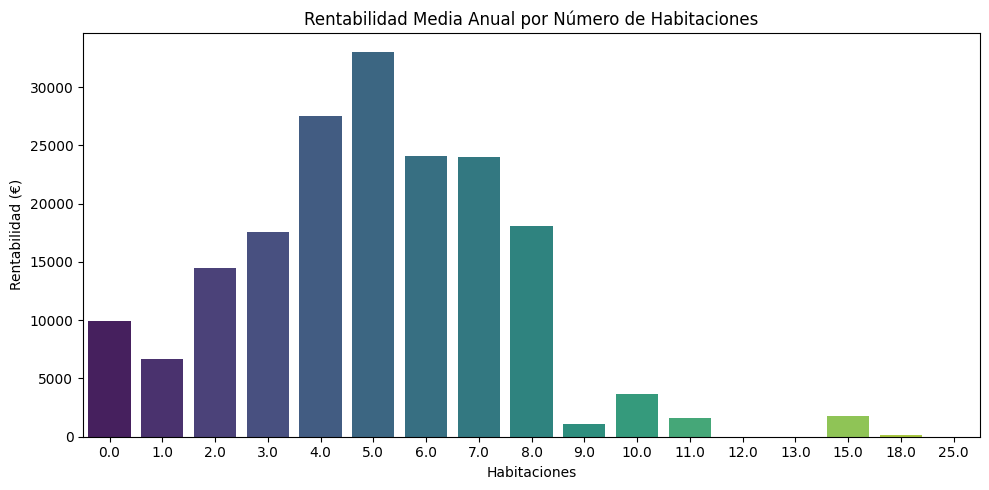

In [122]:
# rentabilidad por n√∫mero de habitaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que bedrooms es num√©rico
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Agrupar y calcular media
bedroom_stats = df.groupby('bedrooms')['estimated_revenue_l365d'].mean().reset_index()

# Gr√°fico
plt.figure(figsize=(10, 5))
sns.barplot(data=bedroom_stats, x='bedrooms', y='estimated_revenue_l365d', palette='viridis')
plt.title('Rentabilidad Media Anual por N√∫mero de Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Rentabilidad (‚Ç¨)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


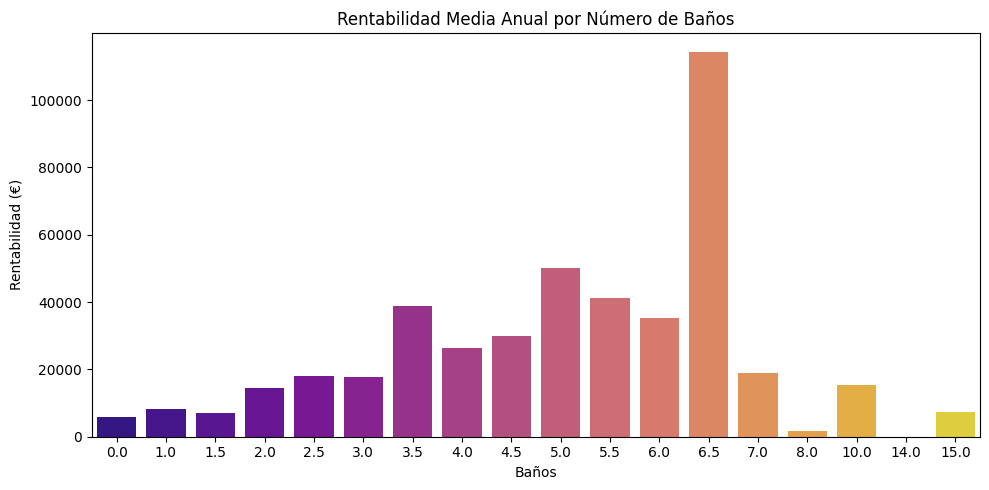

In [124]:
# Convertir 'bathrooms_text' a n√∫mero de ba√±os aproximado
df['bathrooms_text_clean'] = df['bathrooms_text'].astype(str).str.extract(r'(\d+(?:\.\d+)?)')
df['bathrooms'] = pd.to_numeric(df['bathrooms_text_clean'], errors='coerce')

# Agrupar y calcular media
bathroom_stats = df.groupby('bathrooms')['estimated_revenue_l365d'].mean().reset_index()

# Gr√°fico
plt.figure(figsize=(10, 5))
sns.barplot(data=bathroom_stats, x='bathrooms', y='estimated_revenue_l365d', palette='plasma')
plt.title('Rentabilidad Media Anual por N√∫mero de Ba√±os')
plt.xlabel('Ba√±os')
plt.ylabel('Rentabilidad (‚Ç¨)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


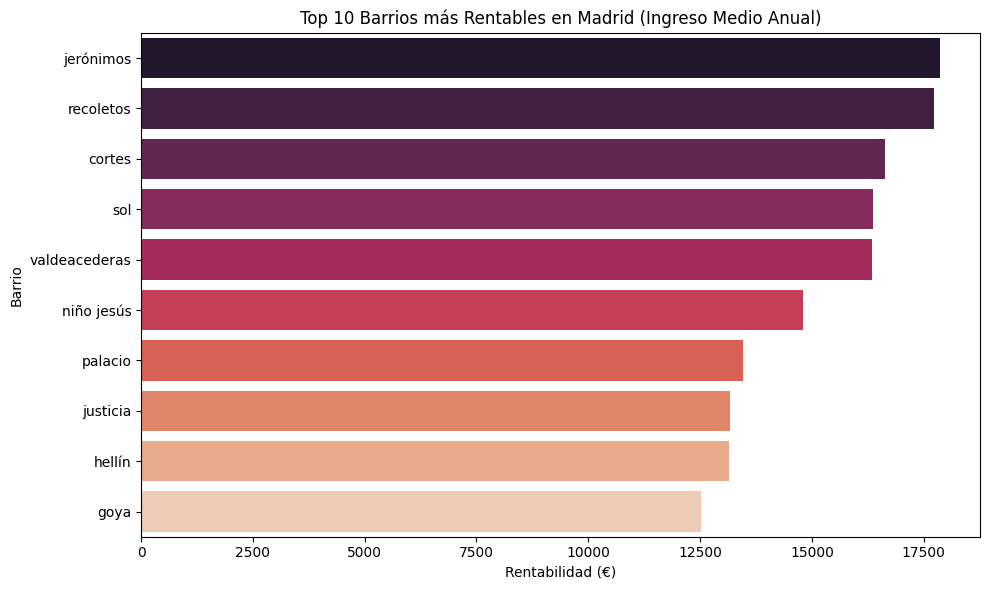

In [125]:
# Agrupar por barrio y calcular la media de ingresos estimados
top_barrios = (
    df.groupby("neighbourhood")["estimated_revenue_l365d"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_barrios, x="estimated_revenue_l365d", y="neighbourhood", palette="rocket")
plt.title("Top 10 Barrios m√°s Rentables en Madrid (Ingreso Medio Anual)")
plt.xlabel("Rentabilidad (‚Ç¨)")
plt.ylabel("Barrio")
plt.tight_layout()
plt.show()


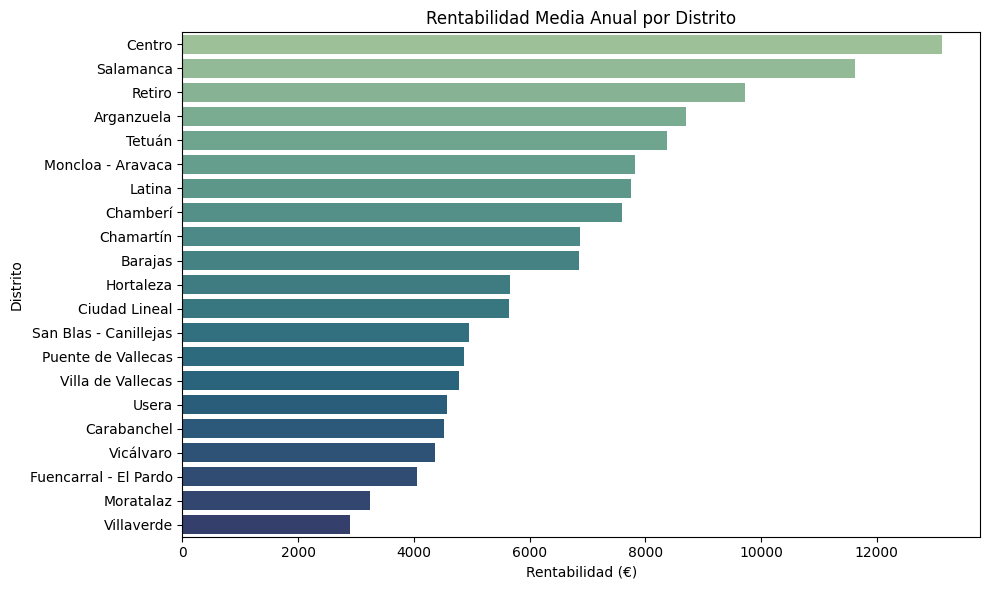

In [126]:
# Agrupar por distrito y calcular la rentabilidad media
grupo_rentabilidad = (
    df.groupby("neighbourhood_group")["estimated_revenue_l365d"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(data=grupo_rentabilidad, x="estimated_revenue_l365d", y="neighbourhood_group", palette="crest")
plt.title("Rentabilidad Media Anual por Distrito")
plt.xlabel("Rentabilidad (‚Ç¨)")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()


In [129]:
print("PRECIO:", df_precio.columns.tolist())
print("RENTABILIDAD:", df_rentabilidad.columns.tolist())
print("LISTINGS:", df_listings.columns.tolist())


PRECIO: ['neighbourhood', 'price_per_m2_jun2025', 'monthly_change', 'quarterly_change', 'annual_change', 'max_historical_price', 'variation_from_max']
RENTABILIDAD: ['neighbourhood', 'estimated_revenue_l365d']
LISTINGS: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 

In [130]:
print("CIUDAD:", df_ciudad.columns.tolist())


CIUDAD: ['neighbourhood', 'price_per_m2_jun2025', 'monthly_change', 'quarterly_change', 'annual_change', 'max_historical_price', 'variation_from_max', 'estimated_revenue_l365d_x', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maxim

In [132]:
print("PRECIO barrios:", set(df_precio['neighbourhood']))
print("RENTABILIDAD barrios:", set(df_rentabilidad['neighbourhood']))
print("LISTINGS barrios:", set(df_listings['neighbourhood']))


PRECIO barrios: {'puente de vallecas', 'latina', 'ciudad lineal', 'centro', 'hortaleza', 'vic√°lvaro', 'tetu√°n', 'retiro', 'barajas', 'moratalaz', 'chamber√≠', 'villa de vallecas', 'fuencarral - el pardo', 'carabanchel', 'usera', 'arganzuela', 'chamart√≠n', 'salamanca', 'moncloa - aravaca', 'san blas - canillejas'}
RENTABILIDAD barrios: {'moscard√≥', 'piovera', 'concepci√≥n', 'valverde', 'pueblo nuevo', 'pac√≠fico', 'c√°rmenes', 'apostol santiago', 'rios rosas', 'marroquina', 'arapiles', 'palos de moguer', 'valdemar√≠n', 'abrantes', 'almenara', 'castilla', 'rejas', 'palomas', 'berruguete', 'acacias', 'butarque', 'estrella', 'chopera', 'el plant√≠o', 'puerta del angel', 'cortes', 'alameda de osuna', 'atalaya', 'san diego', 'bellas vistas', 'castellana', 'los rosales', 'lista', 'zof√≠o', 'palomeras bajas', 'casa de campo', 'aguilas', 'vinateros', 'recoletos', 'amposta', 'pinar del rey', 'san andr√©s', 'corralejos', 'fuente del berro', 'universidad', 'san ferm√≠n', 'santa eugenia', 'coli

In [140]:
# Agrupar rentabilidad y caracter√≠sticas a nivel de distrito
df_rentab_distrito = df_rentabilidad.merge(df_listings[['neighbourhood', 'neighbourhood_group']], on='neighbourhood')
df_rentab_distrito = df_rentab_distrito.groupby('neighbourhood_group').mean(numeric_only=True).reset_index()

# Unir con df_precio por distrito
df_precio['neighbourhood_group'] = df_precio['neighbourhood']  # en ese df, neighbourhood es distrito
df_distrito = df_precio[['neighbourhood_group', 'price_per_m2_jun2025']].merge(
    df_rentab_distrito, on='neighbourhood_group', how='inner'
)

# Verificar
print(df_distrito.head())


Empty DataFrame
Columns: [neighbourhood_group, price_per_m2_jun2025, estimated_revenue_l365d]
Index: []


In [139]:
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))


Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas', 'villaverde']


In [150]:
# Normalizar los nombres de los barrios en ambos DataFrames
df_precio['neighbourhood_group'] = df_precio['neighbourhood_group'].str.lower().str.strip()
df_rentab_distrito['neighbourhood_group'] = df_rentab_distrito['neighbourhood_group'].str.lower().str.strip()

# Verificar los nombres √∫nicos en ambos DataFrames
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

# Unificar los nombres si hay diferencias espec√≠ficas (opcional)
mapeo_nombres = {
    'fuencarral-el pardo': 'fuencarral - el pardo',
    'moncloa-aravaca': 'moncloa - aravaca',
    # Agregar m√°s mapeos si es necesario
}

df_precio['neighbourhood_group'] = df_precio['neighbourhood_group'].replace(mapeo_nombres)
df_rentab_distrito['neighbourhood_group'] = df_rentab_distrito['neighbourhood_group'].replace(mapeo_nombres)

# Verificar nuevamente despu√©s de la unificaci√≥n
print("Distritos unificados en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos unificados en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas', 'villaverde']
Distritos unificados en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de

In [154]:
# muestra los distritos en df_precio y df_rentab_distrito y df_listings
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))
print("Distritos en df_listings:", sorted(df_listings['neighbourhood_group'].unique()))

Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas', 'villaverde']
Distritos en df_listings: ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamart√≠n', 'Chamber√≠', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetu√°n', 'Usera', 'Vic√°lvaro', 'Villa de Vallecas

In [155]:
# Modificar distritos de df_listings para que coincidan con los de df_precio y df_rentab_distrito
df_listings['neighbourhood_group'] = df_listings['neighbourhood_group'].str.lower().str.strip()

In [ ]:
print("Distritos en df_listings:", sorted(df_listings['neighbourhood_group'].unique()))
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

Distritos en df_listings: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas', 'villaverde']


In [158]:
# Verificar los nombres √∫nicos de los distritos en cada DataFrame
print("Distritos en df_listings:", sorted(df_listings['neighbourhood_group'].unique()))
print("Distritos en df_precio:", sorted(df_precio['neighbourhood_group'].unique()))
print("Distritos en df_rentab_distrito:", sorted(df_rentab_distrito['neighbourhood_group'].unique()))

# Identificar diferencias entre los DataFrames
print("\nDistritos en df_listings pero no en df_precio:")
print(sorted(set(df_listings['neighbourhood_group']) - set(df_precio['neighbourhood_group'])))

print("\nDistritos en df_precio pero no en df_listings:")
print(sorted(set(df_precio['neighbourhood_group']) - set(df_listings['neighbourhood_group'])))

print("\nDistritos en df_rentab_distrito pero no en df_precio:")
print(sorted(set(df_rentab_distrito['neighbourhood_group']) - set(df_precio['neighbourhood_group'])))

Distritos en df_listings: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas', 'villaverde']
Distritos en df_precio: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas']
Distritos en df_rentab_distrito: ['arganzuela', 'barajas', 'carabanchel', 'centro', 'chamart√≠n', 'chamber√≠', 'ciudad lineal', 'fuencarral - el pardo', 'hortaleza', 'latina', 'moncloa - aravaca', 'moratalaz', 'puente de vallecas', 'retiro', 'salamanca', 'san blas - canillejas', 'tetu√°n', 'usera', 'vic√°lvaro', 'villa de vallecas

In [163]:
# Agregar Villaverde al DataFrame df_precio
nuevo_distrito = {
    'neighbourhood': 'villaverde',
    'price_per_m2_jun2025': 2500,  # Valor estimado o predeterminado
    # Agrega otras columnas necesarias con valores predeterminados
}

# Convertir a DataFrame y concatenar
df_precio = pd.concat([df_precio, pd.DataFrame([nuevo_distrito])], ignore_index=True)

# Verificar que Villaverde se haya agregado
print(df_precio[df_precio['neighbourhood'] == 'villaverde'])

   neighbourhood  price_per_m2_jun2025 monthly_change quarterly_change annual_change  max_historical_price variation_from_max
20    villaverde                  2500            NaN              NaN           NaN                   NaN                NaN


In [153]:
import pandas as pd

# Cargar el archivo neighbourhoods_madrid.csv
df_neighbourhoods = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\neighbourhoods_madrid.csv')

# Normalizar los nombres de los barrios en el archivo
df_neighbourhoods['neighbourhood'] = df_neighbourhoods['neighbourhood'].str.lower().str.strip()

# Normalizar los nombres de los barrios en los DataFrames barrios_rentabilidad y barrios_listings
df_rentabilidad['neighbourhood'] = df_rentabilidad['neighbourhood'].str.lower().str.strip()
df_listings['neighbourhood'] = df_listings['neighbourhood'].str.lower().str.strip()

# Imputar solo la columna neighbourhood_group desde df_neighbourhoods para evitar duplicados
if 'neighbourhood_group' in df_rentabilidad.columns:
	df_rentabilidad = df_rentabilidad.drop(columns=['neighbourhood_group'])
df_rentabilidad = df_rentabilidad.merge(
	df_neighbourhoods[['neighbourhood', 'neighbourhood_group']],
	on='neighbourhood',
	how='left'
)

if 'neighbourhood_group' in df_listings.columns:
	df_listings = df_listings.drop(columns=['neighbourhood_group'])
df_listings = df_listings.merge(
	df_neighbourhoods[['neighbourhood', 'neighbourhood_group']],
	on='neighbourhood',
	how='left'
)

# Verificar los resultados
print(df_rentabilidad.head())
print(df_listings.head())

  neighbourhood  estimated_revenue_l365d neighbourhood_group_x neighbourhood_group_y neighbourhood_group
0      abrantes              1963.366359           carabanchel           Carabanchel         Carabanchel
1       acacias              8355.398900            arganzuela            Arganzuela          Arganzuela
2       adelfas              4220.961031                retiro                Retiro              Retiro
3    aeropuerto              5282.500000               barajas               Barajas             Barajas
4       aguilas              1692.520604                latina                Latina              Latina
      id                         listing_url       scrape_id last_scraped           source                                          name                                        description                              neighborhood_overview                                        picture_url  host_id                                  host_url host_name  host_since  host_l

In [164]:
import pandas as pd

# Cargar los datasets necesarios
df_precio = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\precio_m2_madrid_barrio_final.csv')
df_rentabilidad = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\rentabilidad_barrio.csv')
df_listings = pd.read_csv(r'c:\Users\Maria.Mezquita\OneDrive\Documentos\GitHub\AIRBNB-PROYECTO-FINAL\data\listings_cleaned_madrid.csv')

# Normalizar nombres de barrios para asegurar consistencia
df_precio['neighbourhood'] = df_precio['neighbourhood'].str.lower().str.strip()
df_rentabilidad['neighbourhood'] = df_rentabilidad['neighbourhood'].str.lower().str.strip()
df_listings['neighbourhood'] = df_listings['neighbourhood'].str.lower().str.strip()

# Combinar los DataFrames en base a la columna 'neighbourhood'
df_ciudad = pd.merge(df_precio, df_rentabilidad, on='neighbourhood', how='inner')
df_ciudad = pd.merge(df_ciudad, df_listings, on='neighbourhood', how='inner')

# Seleccionar columnas relevantes y renombrar columna de rentabilidad
df_ciudad = df_ciudad[['neighbourhood', 'price_per_m2_jun2025', 'estimated_revenue_l365d_x', 
                       'bedrooms', 'accommodates', 'room_type', 'bathrooms', 'neighbourhood_group']]
df_ciudad = df_ciudad.rename(columns={'estimated_revenue_l365d_x': 'estimated_revenue_l365d'})

# Verificar el resultado
print(df_ciudad.head())

Empty DataFrame
Columns: [neighbourhood, price_per_m2_jun2025, estimated_revenue_l365d, bedrooms, accommodates, room_type, bathrooms, neighbourhood_group]
Index: []
